# Lab - Data Transformation

In [67]:
import pandas as pd
import numpy as np
import statistics as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer, StandardScaler, minmax_scale
%matplotlib inline

In [68]:
df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')

In [69]:
numeric = df.select_dtypes(include=[np.number])
categorical = df.select_dtypes(include=[object])

* ### Check if there are highly correlated features and drop them if there are any.

In [70]:
#no correlation >= 0.9

* ### One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. 

In [71]:
categorical.drop(columns=['effective_to_date', 'month'], inplace=True)
categorical['response'] = pd.get_dummies(categorical['response'], drop_first=True)
categorical['region'].replace({'central': 1, 
                               'west region': 2, 
                               'east': 3, 
                               'north west': 4}, inplace=True)
categorical['coverage'].replace({'basic': 1, 
                                 'extended': 2, 
                                 'premium': 3}, inplace=True)
categorical['education'].replace({'high school or below': 0, 
                                  'college': 1, 
                                  'bachelor': 1,
                                  'master': 2,
                                  'doctor': 3}, inplace=True)
categorical['employment_status'].replace({'unemployed': 0, 
                                          'medical leave': 0, 
                                          'disabled': 0,
                                          'retired': 0,
                                          'employed': 1}, inplace=True)
categorical['gender'].replace({'m': 0, 
                               'f': 1}, inplace=True)
categorical['marital_status'].replace({'single': 0, 
                                       'divorced': 1, 
                                       'married': 1}, inplace=True)

In [72]:
categorical

,region,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,1,0,1,1,1,0,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,2,0,1,1,0,1,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,3,0,1,1,1,0,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,4,1,2,1,1,0,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,4,0,3,1,0,1,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1,0,3,1,0,1,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,4,0,1,1,1,1,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,1,0,2,1,1,1,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,2,0,3,1,1,1,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [74]:
categorical['policy_type'].unique()

array(['corporate auto', 'personal auto', 'special auto'], dtype=object)

## Optional

* ### Begin by visually examining distributions (histograms) of the numerical features. Select a variable, call it varA, which takes on a wide range of numerical values, and another, varB, which has noticeably large skew (slanted with respect to the mean). For example, you might select customer_lifetime_value as a candidate varB which has skew.

In [6]:
#varB skew (customer lifetime value)
#numeric['customer_lifetime_value'].hist()

In [7]:
varA = numeric['income']
varB = numeric['customer_lifetime_value']

* ### (VarA) Use minmax transform to bring varA's values into the range [0,1].

In [8]:
minmax_varA = minmax_scale(varA)

* ### (varA) Check that varA has been rescaled using a distplot or a histagram.

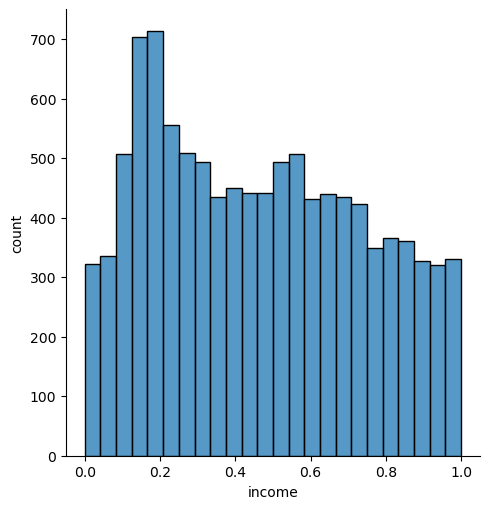

In [9]:
sns.displot(minmax_varA).set_axis_labels('income', 'count')

* ### (varB) Use StandardScalar or PowerTransform to reduce the skew and standardize varB's distribution.

In [10]:
pt = PowerTransformer()

varB = varB.to_numpy()
varB = np.reshape(varB, (-1, 1))
pt.fit(varB)
varB = pt.transform(varB)

varB

array([[-0.33614341],
       [-1.86720472],
       [ 1.2922699 ],
       ...,
       [ 1.79973101],
       [ 1.0217405 ],
       [ 0.24359374]])

* ### (varB) Check that the result has zero mean, unit variance, and reduced skew using mean(), std(), and a plot of the PDF.

In [11]:
round(varB.mean(), 1)

0.0

In [12]:
np.std(varB)

1.0000000000000002

In [13]:
varB = pd.DataFrame(varB)

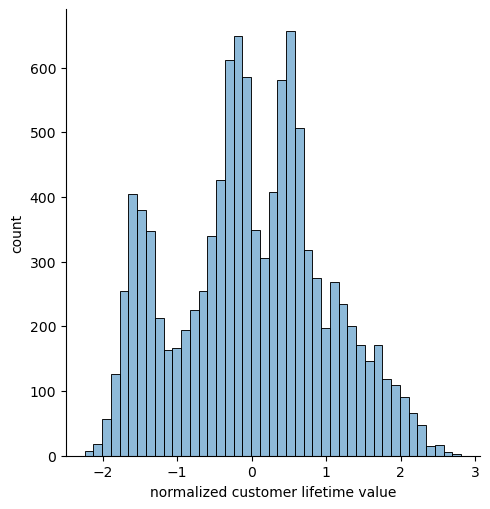

In [17]:
sns.displot(varB, legend=False).set_axis_labels('normalized customer lifetime value', 'count')